# **Problem Statement**

The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). We have a dataset containing images of
cats and dogs and the objective is to train a CNN model to accurately predict the class of each image.

# Importing Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models, regularizers

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing Data and Splitting it into Train and Test

In [109]:
(train_ds, val_ds), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Data Preprocessing

In [110]:
IMG_SIZE = 64
def preprocess_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [111]:
train_batches = train_ds.map(preprocess_img).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_batches = val_ds.map(preprocess_img).batch(32).prefetch(tf.data.AUTOTUNE)

# Model Building
with 2 CNN layers and 2 Hidden Layers (including dropout to reduce overfitting)

In [112]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    # Convolutional Layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    # Hidden Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),

    # ANN Layer
    layers.Dense(1, activation='sigmoid')
])

In [113]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [114]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

In [115]:
print("Starting streamlined training...")
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=50,
                    callbacks=[early_stop])

Starting streamlined training...
Epoch 1/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.5937 - loss: 0.7119 - val_accuracy: 0.6782 - val_loss: 0.5885
Epoch 2/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.6984 - loss: 0.5771 - val_accuracy: 0.7300 - val_loss: 0.5298
Epoch 3/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7379 - loss: 0.5234 - val_accuracy: 0.7334 - val_loss: 0.5377
Epoch 4/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.7635 - loss: 0.4868 - val_accuracy: 0.7670 - val_loss: 0.4878
Epoch 5/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.7891 - loss: 0.4475 - val_accuracy: 0.7509 - val_loss: 0.5196
Epoch 6/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.8126 - loss: 0.4132 - val_accuracy: 0.7483 - val_loss: 0.5068
Epoch 7/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.8327 - loss: 0.3800 - val_accuracy: 0.7655 - val_loss: 0.5474
Epoch 8/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - a

# Visualization

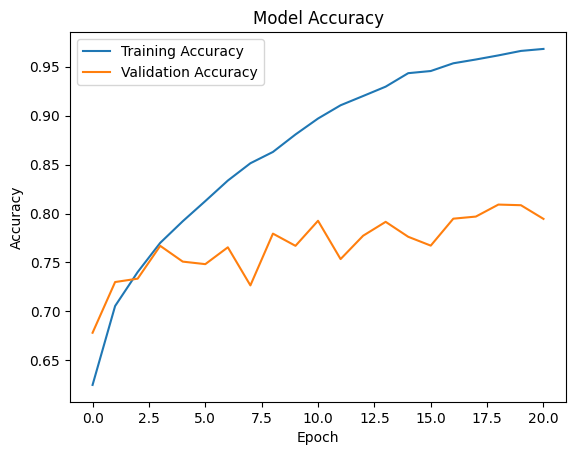

146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7852 - loss: 0.4786
Final Validation Accuracy: 79.26%


In [116]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final assessment on validation set
loss, accuracy = model.evaluate(val_batches)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

Using `SGD Optimizer`, the Validation Accuracy plateau at approx. `78-80%`

# Prediction

In [117]:
def predict_now(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print(f"Result: DOG ({prediction[0][0]*100:.2f}% confidence)")
    else:
        print(f"Result: CAT ({(1-prediction[0][0])*100:.2f}% confidence)")



In [118]:
!wget -O test_img.jpg https://placedog.net/500/500
predict_now('test_img.jpg')

--2026-01-31 12:58:17--  https://placedog.net/500/500
Resolving placedog.net (placedog.net)... 104.21.11.85, 172.67.165.174, 2606:4700:3034::6815:b55, ...
Connecting to placedog.net (placedog.net)|104.21.11.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpg]
Saving to: ‘test_img.jpg’

test_img.jpg            [ <=>                ]  39.40K  --.-KB/s    in 0s      

2026-01-31 12:58:18 (165 MB/s) - ‘test_img.jpg’ saved [40346]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Result: DOG (99.14% confidence)


The new image provided to the model is predicted correctly with a confidence index of `99.14%`